# UNDER CONSTRUCTION

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


Frist, we define the parameters,  $\Delta t$, and the lenght of the simulation.

Then, let's define our Euler-Maruyama initial steps:

- Draw the random numbers
- Set initial conditions

In [24]:
N = 1000
gama = 0.1
beta =  1/(N*8)

tmax = 600 
dt = 0.1
times = np.arange(0, tmax+dt, dt)
NumberOfSteps = len(times)

S = np.zeros(NumberOfSteps)
I = np.zeros(NumberOfSteps)

I[0] = 100
S[0] = N - I[0]

Etas=random.randn(2,NumberOfSteps)


## Euler-Maruyama steps

Let's now code Euler Maruyama
$$ S(t+dt) = S(t)+(-\beta S(t)I(t) +\gamma I(t))dt - \sqrt{\beta S(t)I(t) dt} \eta_{1,t} +\sqrt{\gamma I(t) dt }\eta_{2,t},$$
$$ I(t+dt) = I(t)+(\beta S(t)I(t) -\gamma I(t))dt + \sqrt{\beta S(t)I(t) dt} \eta_{1,t} -\sqrt{\gamma I(t) dt }\eta_{2,t}.$$



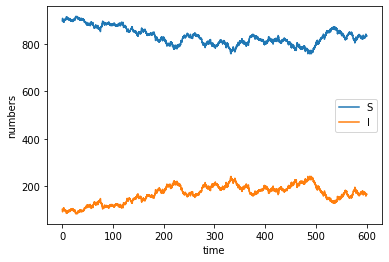

In [29]:

for i in range(NumberOfSteps-1):
    if I[i] <=0:
        print(i)
        I[i] = 0
        S[i:] = N
        break
    a = beta * S[i] * I[i] * dt
    b = gama * I[i] * dt

    S[i+1] = S[i] - a + b - np.sqrt(a) * Etas[0,i] + np.sqrt(b) * Etas[1,i]
    I[i+1] = I[i] + a - b + np.sqrt(a) * Etas[0,i] - np.sqrt(b) * Etas[1,i]
    #I[i+1] = N - S[i]



##Once you've created a random walk (or other algorithm) you might want to display it
plt.figure()
plt.plot(times,S,label='S')
plt.plot(times,I,label='I')
plt.xlabel('time')
plt.ylabel('numbers')
plt.legend()
plt.show()
